 https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 한글폰트 사용 시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

## plot
    kind : str
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbinplot     

<AxesSubplot:>

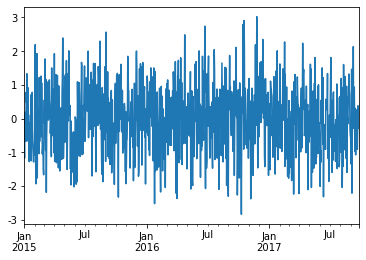

In [15]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2015', periods=1000))
ts.plot()

<AxesSubplot:>

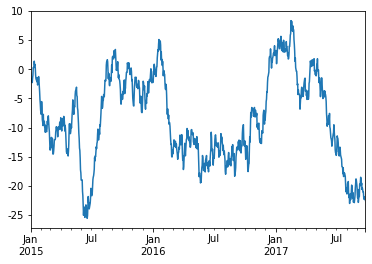

In [16]:
ts = ts.cumsum()
ts.plot()

In [19]:
df = pd.DataFrame(np.random.randn(1000,4), index=pd.date_range('1/1/2015', periods=1000),
                 columns=['A', 'B', 'C', 'D'])
df.shape

(1000, 4)

<AxesSubplot:>

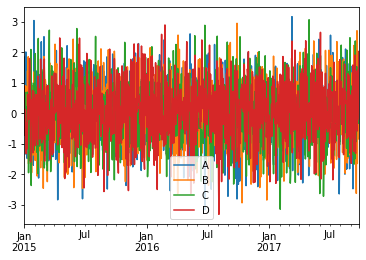

In [20]:
df.plot()

<AxesSubplot:>

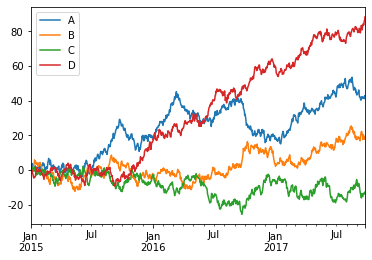

In [21]:
df = df.cumsum()
df.plot()

In [23]:
df3 = pd.DataFrame(np.random.randn(1000,2), columns=['B', 'C'])
df3

,B,C
0,0.370892,-1.454227
1,1.422302,0.253404
2,0.459991,-0.710135
3,-0.336270,-0.421988
4,-0.444023,0.262396
...,...,...
995,0.095611,-0.945537
996,1.122453,-0.087371
997,0.032313,1.331517
998,1.179235,-0.250850


In [25]:
df3['A'] = pd.Series(list(range(len(df))))
df3.head()

,B,C,A
0,0.370892,-1.454227,0
1,1.422302,0.253404,1
2,0.459991,-0.710135,2
3,-0.336270,-0.421988,3
4,-0.444023,0.262396,4


<AxesSubplot:xlabel='A'>

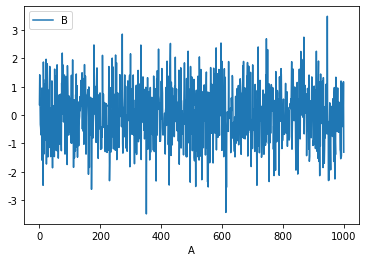

In [26]:
df3.plot(x='A', y='B')

## bar plot

In [29]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2015', periods=1000))
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=list('ABCD'))

<AxesSubplot:>

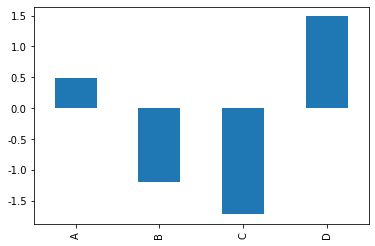

In [30]:
df.iloc[5].plot(kind='bar')

<AxesSubplot:>

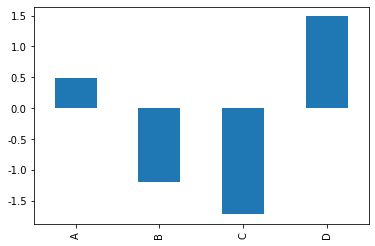

In [31]:
df.iloc[5].plot.bar()

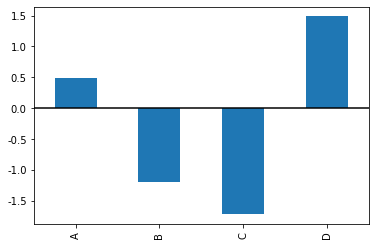

In [32]:
df.iloc[5].plot.bar()
plt.axhline(0, color='k')

<AxesSubplot:>

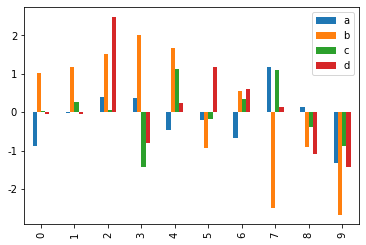

In [35]:
df2 = pd.DataFrame(np.random.randn(10,4), columns=list('abcd'))
df2.plot.bar()

<AxesSubplot:>

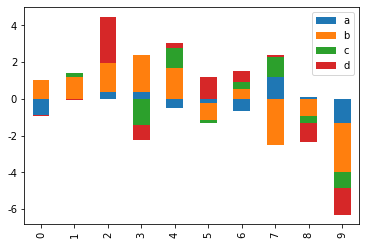

In [36]:
df2.plot.bar(stacked=True)

<AxesSubplot:>

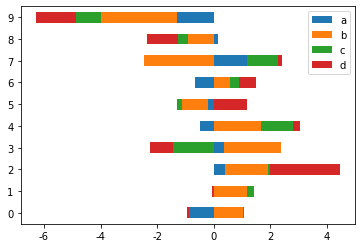

In [37]:
df2.plot.barh(stacked=True)

## histogram

In [38]:
df4 = pd.DataFrame({"a": np.random.randn(1000) + 1,
                    "b": np.random.randn(1000),
                    "c": np.random.randn(1000) - 1,},
      columns=["a", "b", "c"])
df4

,a,b,c
0,0.639989,0.952514,-1.009995
1,1.834264,-0.425105,-1.649013
2,1.395951,0.382885,-1.575234
3,2.063810,0.636006,-1.417767
4,1.465562,-0.198750,-1.245828
...,...,...,...
995,1.548852,-0.001933,0.098167
996,1.377779,-0.762974,-0.799848
997,0.352132,-0.361827,0.926877
998,1.249632,-0.757066,-2.053385


<AxesSubplot:ylabel='Frequency'>

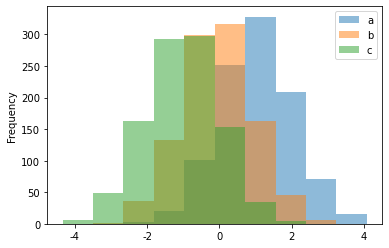

In [40]:
df4.plot.hist(alpha=0.5)
# alpha는 투명도값

<AxesSubplot:ylabel='Frequency'>

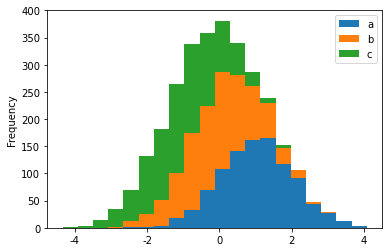

In [41]:
df4.plot.hist(stacked=True, bins=20)
# bin은 막대 개수

<AxesSubplot:xlabel='Frequency'>

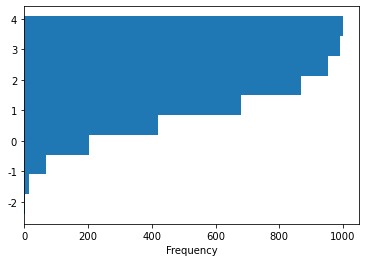

In [43]:
df4['a'].plot.hist(orientation='horizontal', cumulative=True)

<AxesSubplot:>

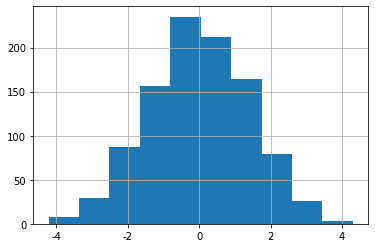

In [45]:
df4['a'].diff().hist()
# diff는 해당 column 에 대한 차분(앞값과 뒷값의 차이)

In [46]:
df4['a_diff'] = df4['a'].diff()
df4['a_shift'] = df4['a'].shift(1)
df4['a_minus'] = df4['a_diff'] - df4['a_shift']

df4[['a', 'a_diff', 'a_shift', 'a_minus']]

,a,a_diff,a_shift,a_minus
0,0.639989,NaN,NaN,NaN
1,1.834264,1.194275,0.639989,0.554286
2,1.395951,-0.438313,1.834264,-2.272577
3,2.063810,0.667859,1.395951,-0.728092
4,1.465562,-0.598248,2.063810,-2.662058
...,...,...,...,...
995,1.548852,1.251098,0.297754,0.953345
996,1.377779,-0.171073,1.548852,-1.719925
997,0.352132,-1.025647,1.377779,-2.403426
998,1.249632,0.897500,0.352132,0.545369


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'c'}>, <AxesSubplot:>]], dtype=object)

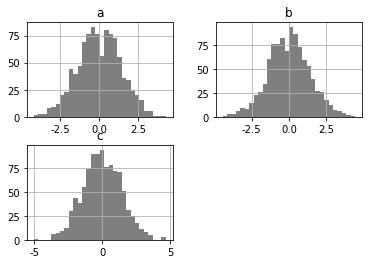

In [49]:
df4[['a', 'b', 'c']].diff().hist(color='k', alpha=0.5, bins=30)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

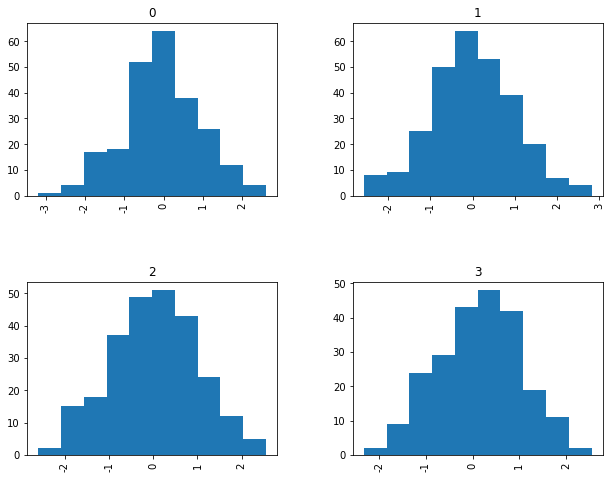

In [53]:
data = pd.Series(np.random.randn(1000))
data.hist(by=np.random.randint(0, 4, 1000), figsize=(10, 8))

## boxplot

In [64]:
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])
df.describe()

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.520672,0.467855,0.586425,0.595295,0.677793
std,0.259668,0.265726,0.377259,0.311924,0.310700
min,0.174710,0.018041,0.007393,0.118713,0.126572
25%,0.302525,0.319010,0.284603,0.398697,0.677352
50%,0.552348,0.563307,0.787334,0.696736,0.719575
75%,0.645124,0.635254,0.862597,0.841203,0.917962
max,0.960935,0.837292,0.971484,0.944573,0.992589


<AxesSubplot:>

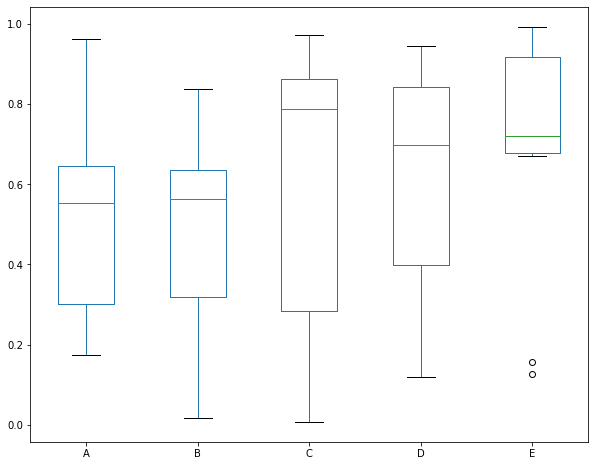

In [65]:
df.plot.box(figsize=(10,8))

In [66]:
color = {"boxes": "DarkGreen", "whiskers": "DarkOrange",
        "medians": "DarkBlue", "caps": "Gray"}

<AxesSubplot:>

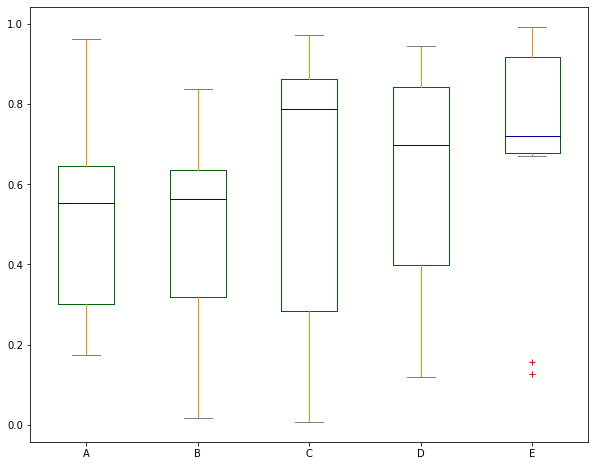

In [69]:
df.plot.box(color=color, sym='r+', figsize=(10,8))

In [70]:
df = pd.DataFrame(np.random.rand(10,5))
df

,0,1,2,3,4
0,0.356992,0.523305,0.118697,0.738530,0.908680
1,0.065215,0.368619,0.980429,0.580991,0.501057
2,0.193657,0.933826,0.495944,0.716607,0.606980
3,0.773429,0.404597,0.828079,0.542410,0.257930
4,0.804196,0.628348,0.915728,0.203203,0.943271
5,0.124143,0.678481,0.753194,0.919109,0.827862
6,0.674761,0.095176,0.937648,0.148959,0.055681
7,0.686479,0.664420,0.093588,0.342322,0.431847
8,0.792427,0.309866,0.861094,0.809427,0.538841
9,0.570021,0.748407,0.425288,0.861040,0.741719


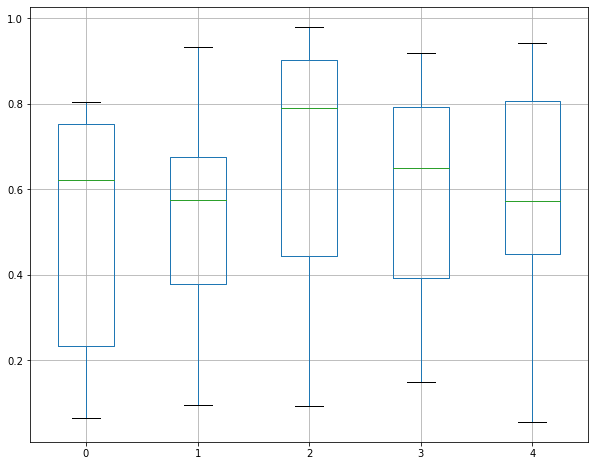

In [72]:
bp = df.boxplot(figsize = (10,8))

In [74]:
df = pd.DataFrame(np.random.rand(10, 2), columns=["Col1", "Col2"])
df

,Col1,Col2
0,0.714782,0.208075
1,0.671295,0.018413
2,0.070411,0.614766
3,0.084848,0.137819
4,0.670959,0.261817
5,0.305651,0.683197
6,0.771631,0.528755
7,0.299114,0.851945
8,0.662317,0.159202
9,0.440278,0.836679


In [75]:
df["X"] = pd.Series(["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"])
df

,Col1,Col2,X
0,0.714782,0.208075,A
1,0.671295,0.018413,A
2,0.070411,0.614766,A
3,0.084848,0.137819,A
4,0.670959,0.261817,A
5,0.305651,0.683197,B
6,0.771631,0.528755,B
7,0.299114,0.851945,B
8,0.662317,0.159202,B
9,0.440278,0.836679,B


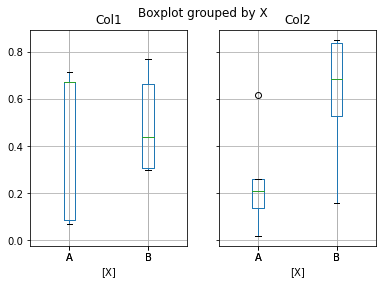

In [78]:
bp = df.boxplot(by='X')

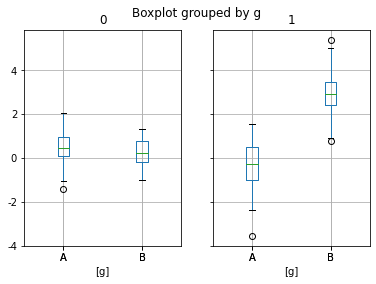

In [79]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box["g"] = np.random.choice(["A", "B"], size=50)
df_box.loc[df_box["g"] == "B", 1] += 3
bp = df_box.boxplot(by="g")

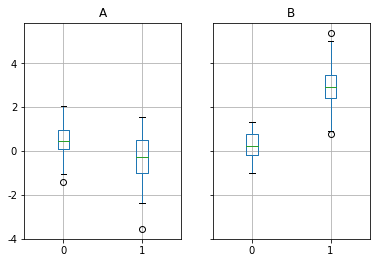

In [82]:
bp = df_box.groupby('g').boxplot()

## area plot

In [83]:
df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df

,a,b,c,d
0,0.556895,0.084774,0.333002,0.728429
1,0.142435,0.552469,0.273043,0.974495
2,0.667787,0.255653,0.108311,0.776181
3,0.782478,0.761604,0.914403,0.658623
4,0.568368,0.201756,0.698296,0.952195
5,0.889963,0.993567,0.818704,0.545122
6,0.451254,0.890557,0.973265,0.593411
7,0.366074,0.323095,0.871423,0.215634
8,0.734945,0.365619,0.801603,0.782736
9,0.701355,0.622777,0.493683,0.840538


<AxesSubplot:>

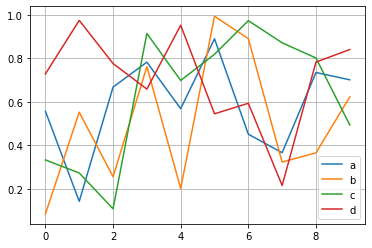

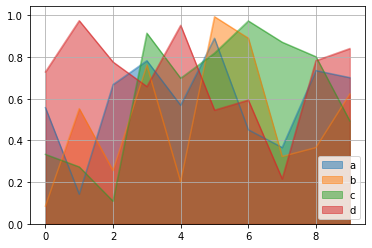

In [87]:
df.plot(grid = True)
df.plot.area(stacked=False, grid=True) 
# areaplot은 default로 stacked=True
# grid는 격자 그려주는 옵션

## scatter plot

In [89]:
df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])
df.head()

,a,b,c,d
0,0.753544,0.270584,0.522303,0.098329
1,0.713637,0.884041,0.567054,0.994482
2,0.178740,0.012200,0.456998,0.931752
3,0.846025,0.473330,0.902555,0.225996
4,0.304154,0.714994,0.724091,0.018676


<AxesSubplot:xlabel='a', ylabel='b'>

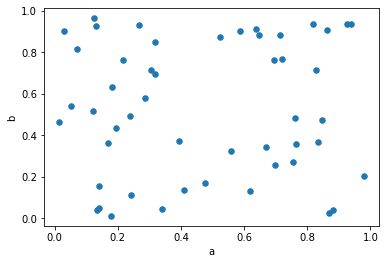

In [92]:
df.plot.scatter(x='a', y='b', s=30)
# s는 point size 옵션

<AxesSubplot:xlabel='c', ylabel='d'>

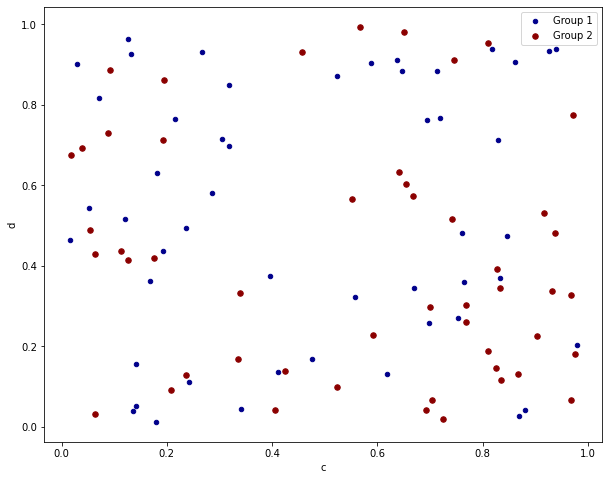

In [98]:
ax = df.plot.scatter(x="a", y="b", color="DarkBlue", label="Group 1")
df.plot.scatter(x="c", y="d", color="DarkRed", label="Group 2", ax=ax, figsize=(10,8), s=30)

<AxesSubplot:xlabel='a', ylabel='b'>

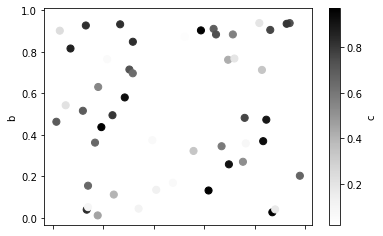

In [99]:
df.plot.scatter(x='a', y='b', c='c', s=50)

<AxesSubplot:xlabel='a', ylabel='b'>

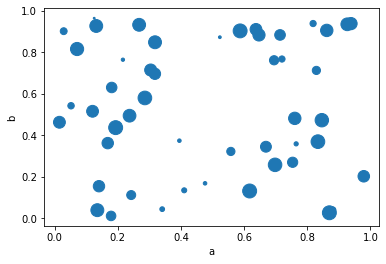

In [100]:
df.plot.scatter(x='a', y='b', s=df['c']*200)
# 클수록 점이 커지게

## Hexagonal Bin plot

In [105]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])
df['b'] = df['b'] + np.arange(1000)
df.head()

,a,b
0,-0.623699,0.442333
1,0.167665,0.862182
2,-0.474682,2.050184
3,0.801250,2.924033
4,-0.696433,5.668865


<AxesSubplot:xlabel='a', ylabel='b'>

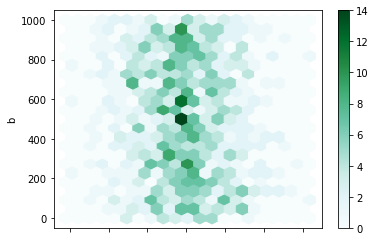

In [110]:
df.plot.hexbin(x='a', y='b', gridsize=20)

In [111]:
df['z'] = np.random.uniform(0, 3, 1000)
df

,a,b,z
0,-0.623699,0.442333,1.177217
1,0.167665,0.862182,1.865284
2,-0.474682,2.050184,2.625643
3,0.801250,2.924033,2.553932
4,-0.696433,5.668865,1.337243
...,...,...,...
995,0.825238,994.821492,0.369866
996,-2.081319,993.793605,0.856301
997,1.486741,998.153491,1.727960
998,-0.385311,998.055015,1.202672


<AxesSubplot:xlabel='a', ylabel='b'>

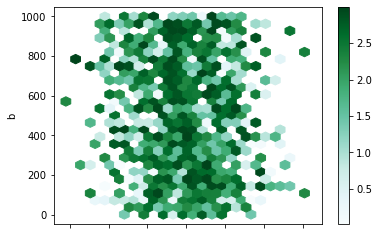

In [114]:
df.plot.hexbin(x="a", y="b", C="z", reduce_C_function=np.max, gridsize=25)

## Pie plot

<AxesSubplot:ylabel='series'>

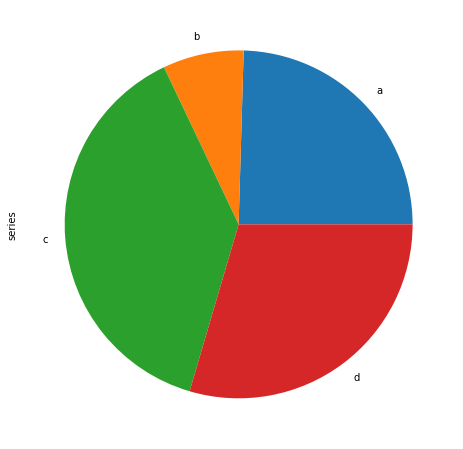

In [116]:
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")
series.plot.pie(figsize=(10, 8))

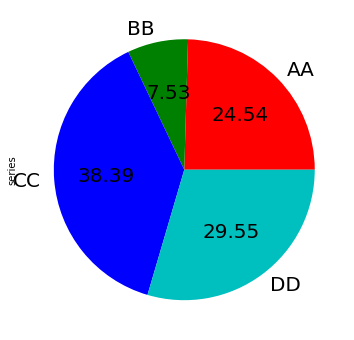

In [120]:
series.plot.pie(labels=["AA", "BB", "CC", "DD"],
                colors=["r", "g", "b", "c"],
                autopct="%.2f",
                fontsize=20,
                figsize=(6, 6))

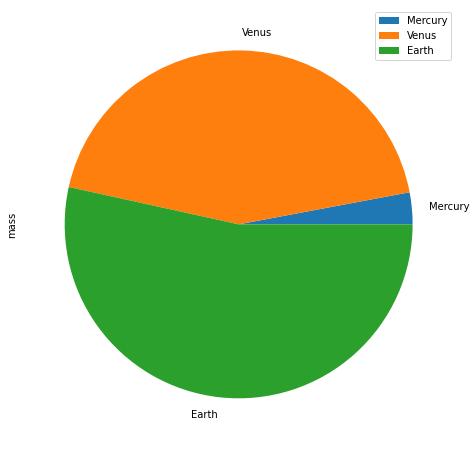

In [118]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(y='mass', figsize=(10, 8))

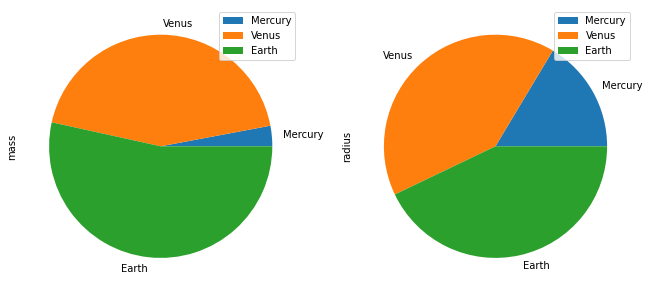

In [119]:
plot = df.plot.pie(subplots=True, figsize=(11, 6))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


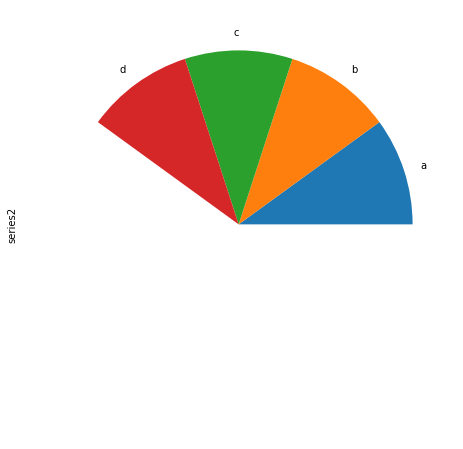

In [122]:
series = pd.Series([0.1] * 4, index=["a", "b", "c", "d"], name="series2")
series.plot.pie(figsize=(10, 8));

## Scatter Matrix plot

array([[<AxesSubplot:xlabel='a', ylabel='a'>,
        <AxesSubplot:xlabel='b', ylabel='a'>,
        <AxesSubplot:xlabel='c', ylabel='a'>,
        <AxesSubplot:xlabel='d', ylabel='a'>],
       [<AxesSubplot:xlabel='a', ylabel='b'>,
        <AxesSubplot:xlabel='b', ylabel='b'>,
        <AxesSubplot:xlabel='c', ylabel='b'>,
        <AxesSubplot:xlabel='d', ylabel='b'>],
       [<AxesSubplot:xlabel='a', ylabel='c'>,
        <AxesSubplot:xlabel='b', ylabel='c'>,
        <AxesSubplot:xlabel='c', ylabel='c'>,
        <AxesSubplot:xlabel='d', ylabel='c'>],
       [<AxesSubplot:xlabel='a', ylabel='d'>,
        <AxesSubplot:xlabel='b', ylabel='d'>,
        <AxesSubplot:xlabel='c', ylabel='d'>,
        <AxesSubplot:xlabel='d', ylabel='d'>]], dtype=object)

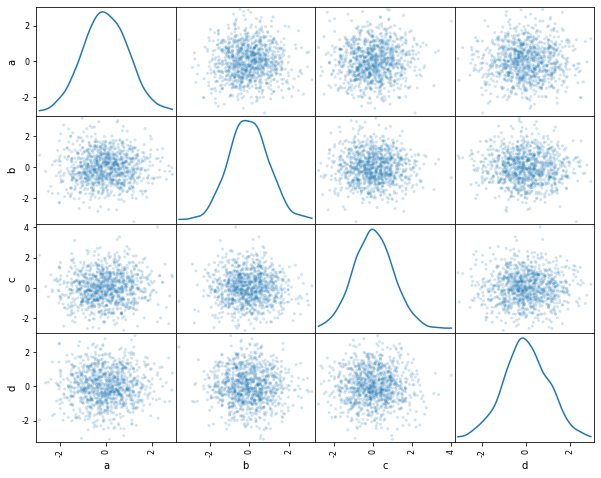

In [124]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=["a", "b", "c", "d"])
scatter_matrix(df, alpha=0.2, figsize=(10, 8), diagonal="kde")

array([[<AxesSubplot:xlabel='a', ylabel='a'>,
        <AxesSubplot:xlabel='b', ylabel='a'>,
        <AxesSubplot:xlabel='c', ylabel='a'>,
        <AxesSubplot:xlabel='d', ylabel='a'>],
       [<AxesSubplot:xlabel='a', ylabel='b'>,
        <AxesSubplot:xlabel='b', ylabel='b'>,
        <AxesSubplot:xlabel='c', ylabel='b'>,
        <AxesSubplot:xlabel='d', ylabel='b'>],
       [<AxesSubplot:xlabel='a', ylabel='c'>,
        <AxesSubplot:xlabel='b', ylabel='c'>,
        <AxesSubplot:xlabel='c', ylabel='c'>,
        <AxesSubplot:xlabel='d', ylabel='c'>],
       [<AxesSubplot:xlabel='a', ylabel='d'>,
        <AxesSubplot:xlabel='b', ylabel='d'>,
        <AxesSubplot:xlabel='c', ylabel='d'>,
        <AxesSubplot:xlabel='d', ylabel='d'>]], dtype=object)

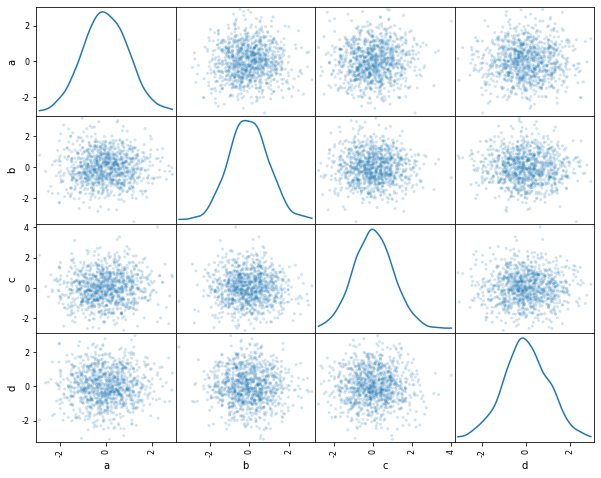

In [125]:
# kde - 커널밀도함수
scatter_matrix(df, alpha=0.2, figsize=(10,8), diagonal='kde')

## Kernel Density Estimate plot

In [126]:
ser = pd.Series(np.random.randn(1000))
ser.head()

0    0.257978
1    1.126320
2   -0.455402
3   -0.680839
4   -0.129502
dtype: float64

<AxesSubplot:ylabel='Frequency'>

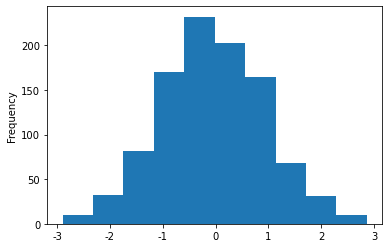

In [134]:
ser.plot.hist()

<AxesSubplot:ylabel='Density'>

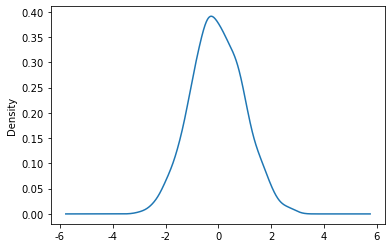

In [130]:
ser.plot.density()

<AxesSubplot:ylabel='Density'>

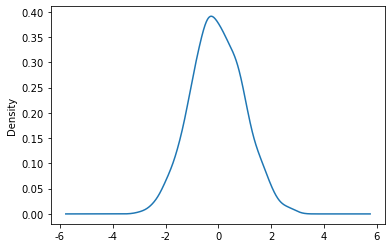

In [131]:
ser.plot.kde()